In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# 1.Create a time-series plot showing daily total revenue for three different
# countries with three countries in one plot (you will want matplotlib for this)


# SELECT p.payment_date, c.country_name, SUM(p.amount) AS Daily_total_revenue
# FROM payment p
# JOIN customer cust ON p.customer_id = cust.customer_id
# JOIN address addr ON cust.address_id = addr.address_id
# JOIN city ci ON addr.city_id = ci.city_id
# JOIN country c ON ci.country_id = c.country_id
# WHERE c.country_name IN ('Canada', 'Chad', 'China')
# GROUP BY p.payment_date, c.country_id
# ORDER BY p.payment_date
# import pandas as pd
# import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
revenue_data = pd.read_csv('daily.csv')

revenue_data

,payment_date,country_name,daily_total_revenue
0,2007-02-14 22:16:01.996577,China,2.99
1,2007-02-14 22:43:41.996577,China,2.99
2,2007-02-14 23:10:43.996577,China,1.99
3,2007-02-15 00:50:12.996577,China,0.99
4,2007-02-15 02:07:15.996577,China,4.99
...,...,...,...
1437,2007-04-30 23:34:53.996577,Canada,3.99
1438,2007-04-30 23:35:53.996577,China,4.99
1439,2007-04-30 23:47:19.996577,China,2.99
1440,2007-05-14 13:44:29.996577,Canada,3.98


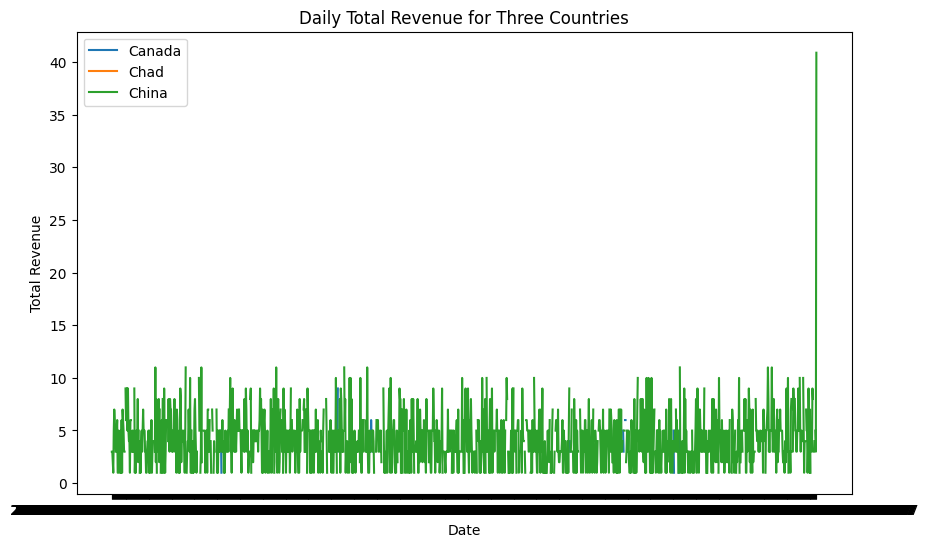

In [35]:
# 1.Create a time-series plot showing daily total revenue for three different
# countries with three countries in one plot (you will want matplotlib for this)


# Filter data for the three countries of interest
countries = ['Canada', 'Chad', 'China']
filtered_data = revenue_data[revenue_data['country_name'].isin(countries)]

# Pivot the data to have countries as columns
pivot_data = filtered_data.pivot(index='payment_date', columns='country_name', values='daily_total_revenue')

# Plotting
plt.figure(figsize=(10, 6))
for country in countries:
    plt.plot(pivot_data.index, pivot_data[country], label=country)

plt.title('Daily Total Revenue for Three Countries')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


In [38]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00


In [41]:
#2.Carry out a sentiment analysis on movie descriptions adding another column
# to the data frame that provides a sentiment classification. This can be based on
# a “rules based system” that you coded OR inference from a LLM such as using the API for chatgpt.


# SELECT film_id, title, description
# FROM film

import pandas as pd
from transformers import pipeline

# Read the movie descriptions from a CSV file into a DataFrame
df = pd.read_csv('film.csv')
df.head(10)


,film_id,title,description
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...
5,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...
6,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...
7,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...
8,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...
9,6,Agent Truman,A Intrepid Panorama of a Robot And a Boy who m...


In [42]:
#2.Carry out a sentiment analysis on movie descriptions adding another column
# to the data frame that provides a sentiment classification. This can be based on
# a “rules based system” that you coded OR inference from a LLM such as using the API for chatgpt.


# Initialize the sentiment analysis model
sentiment_classifier = pipeline("sentiment-analysis")

# Perform sentiment analysis on each movie description
sentiment_scores = []
for description in df['description']:
    sentiment_result = sentiment_classifier(description)[0]
    sentiment_scores.append(sentiment_result['label'])

# Add the sentiment classification column to the DataFrame
df['sentiment'] = sentiment_scores

# Display the updated DataFrame with the sentiment classification
print(df)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


     film_id              title  \
0        133    Chamber Italian   
1        384   Grosse Wonderful   
2          8    Airport Pollock   
3         98  Bright Encounters   
4          1   Academy Dinosaur   
..       ...                ...   
995      996     Young Language   
996      997         Youth Kick   
997      998       Zhivago Core   
998      999  Zoolander Fiction   
999     1000          Zorro Ark   

                                           description sentiment  
0    A Fateful Reflection of a Moose And a Husband ...  POSITIVE  
1    A Epic Drama of a Cat And a Explorer who must ...  POSITIVE  
2    A Epic Tale of a Moose And a Girl who must Con...  POSITIVE  
3    A Fateful Yarn of a Lumberjack And a Feminist ...  POSITIVE  
4    A Epic Drama of a Feminist And a Mad Scientist...  POSITIVE  
..                                                 ...       ...  
995  A Unbelieveable Yarn of a Boat And a Database ...  NEGATIVE  
996  A Touching Drama of a Teacher And a Ca

In [30]:
# 3.Create a visual in the notebook that shows how much revenue is coming
# from different countries to the DVD store (you will want matplotlib).

# SELECT c.country_name, SUM(p.amount) AS revenue
# FROM country c
# JOIN city ci ON c.country_id = ci.country_id
# JOIN address a ON ci.city_id = a.city_id
# JOIN customer cust ON a.address_id = cust.address_id
# JOIN payment p ON cust.customer_id = p.customer_id
# GROUP BY c.country_name
# ORDER BY revenue DESC

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have retrieved the data from the SQL query and saved it as a CSV file
data = pd.read_csv('revenue.csv')
data

,country_name,revenue
0,India,6034.78
1,China,5251.03
2,United States,3685.31
3,Japan,3122.51
4,Mexico,2984.82
...,...,...
103,Afghanistan,67.82
104,Tonga,64.84
105,Saint Vincent and the Grenadines,64.82
106,Lithuania,63.78


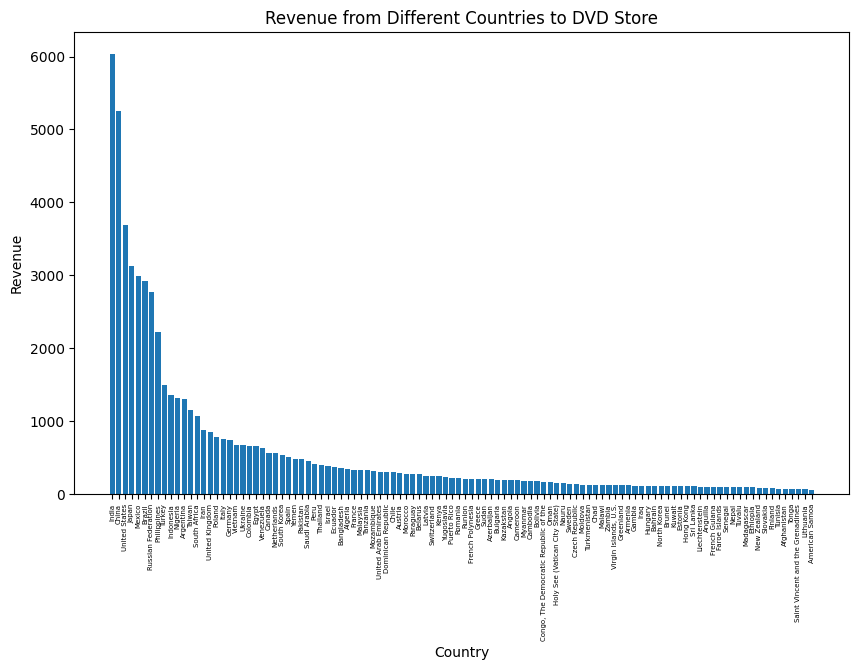

In [31]:
# 3.Create a visual in the notebook that shows how much revenue is coming
# from different countries to the DVD store (you will want matplotlib).


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(data['country_name'], data['revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue from Different Countries to DVD Store')
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [12]:
# 4.Do an analysis to show which actors are bringing
# in the most revenue (top 10 ranked)

# SELECT a.actor_id, a.first_name, a.last_name, SUM(p.amount) AS revenue
# FROM actor a
# JOIN film_actor fa ON a.actor_id = fa.actor_id
# JOIN film f ON fa.film_id = f.film_id
# JOIN inventory i ON f.film_id = i.film_id
# JOIN rental r ON i.inventory_id = r.inventory_id
# JOIN payment p ON r.rental_id = p.rental_id
# GROUP BY a.actor_id, a.first_name, a.last_name
# ORDER BY revenue DESC
# LIMIT 10

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('topten.csv')

data



,actor_id,first_name,last_name,revenue
0,107,Gina,Degeneres,3129.17
1,181,Matthew,Carrey,2543.78
2,198,Mary,Keitel,2426.92
3,81,Scarlett,Damon,2403.81
4,102,Walter,Torn,2403.18
5,60,Henry,Berry,2392.36
6,58,Christian,Akroyd,2378.97
7,144,Angela,Witherspoon,2357.11
8,111,Cameron,Zellweger,2322.94
9,28,Woody,Hoffman,2315.92


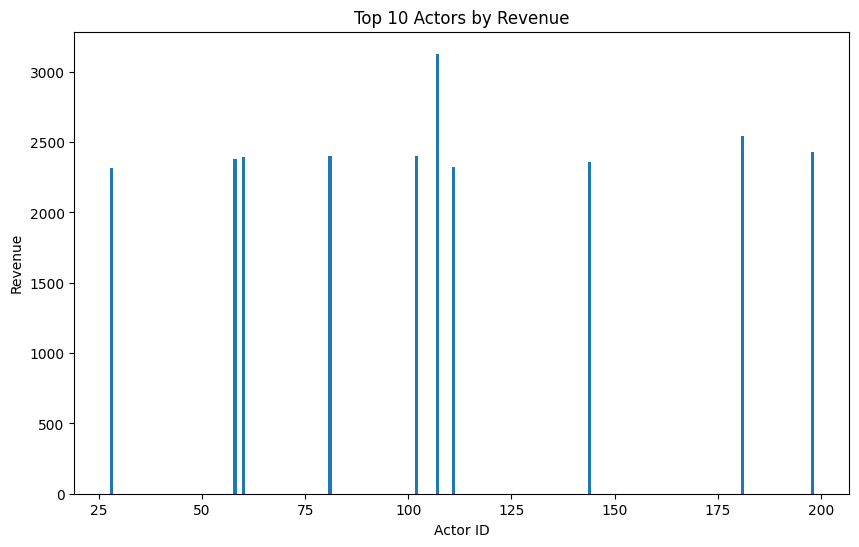

In [27]:
# 4.Do an analysis to show which actors are bringing
# in the most revenue (top 10 ranked)


# Sort the DataFrame by revenue in descending order and select the top 10 actors

top_actors = data.sort_values(by='revenue', ascending=False).head(10)

# Create a bar plot of the top 10 actors by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_actors['actor_id'], top_actors['revenue'])
plt.xlabel('Actor ID')
plt.ylabel('Revenue')
plt.title('Top 10 Actors by Revenue')

plt.show()

In [19]:

# 5.Create a new data-frame where you classify some different countries into
# some categories that make sense to you (8 countries min, 20 max) in this df
# there will be two columns, one column will give the country name, the other
# column will give the classification category.

# SELECT
#     c.country_name,
#     CASE
#         WHEN c.country_name IN ('United States', 'Canada', 'American Samoa') THEN 'North America'
#         WHEN c.country_name IN ('United Kingdom', 'Austria', 'France') THEN 'Europe'
#         WHEN c.country_name IN ('Afghanistan', 'Armenia', 'Azerbaijan') THEN 'West Asia'
# 		WHEN c.country_name IN ('Algeria', 'Angola', 'Anguilla') THEN 'Africa'
#         WHEN c.country_name IN ('Brazil', 'Argentina', 'Colombia') THEN 'South America'
#         ELSE 'Others'
#     END AS classification
# FROM
#     country c


import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('classification.csv')


# Print the DataFrame
print(df.head(10))

     country_name classification
0     Afghanistan      West Asia
1         Algeria         Africa
2  American Samoa  North America
3          Angola         Africa
4        Anguilla         Africa
5       Argentina  South America
6         Armenia      West Asia
7       Australia         Others
8         Austria         Europe
9      Azerbaijan      West Asia


In [24]:

# 6. Use an appropriate merge to merge that new data-frame from the last step
# with a dataframe from the dvd db, that gives the countries, so now countries
# are connected with their classification. (no need to add this table back to the
# postgresql db, just doing it in the notebook is fine)


# SELECT country_id, country
# FROM country


import pandas as pd

# Read the country-classification DataFrame from the CSV file
classification_df = pd.read_csv('classification.csv')

# Read the country DataFrame from the DVD Rental database
country_df = pd.read_csv('country.csv')  # Replace with the actual country DataFrame from the DVD Rental database

# Merge the DataFrames based on the 'country' column
merged_df = pd.merge(country_df, classification_df, on='country_name')

# Print the merged DataFrame
print(merged_df.head(10))


   country_id    country_name classification
0           1     Afghanistan      West Asia
1           2         Algeria         Africa
2           3  American Samoa  North America
3           4          Angola         Africa
4           5        Anguilla         Africa
5           6       Argentina  South America
6           7         Armenia      West Asia
7           8       Australia         Others
8           9         Austria         Europe
9          10      Azerbaijan      West Asia
